#### Pridicting Flight Delay By using Advance Machine Learning Algorithms.

**About Dataset**

The dataset contains the following features:
There are 22 columns for the dataset and corresponding column description are given below.  
    
1. Day of Month
2. Day of Week starting from Monday
3. Unique Carrier Code.
4. An identification number assigned by US DOT to identify a unique airline (carrier).
5. Code assigned by IATA and commonly used to identify a carrier.
6. Tail Number
7. Flight Number
8. Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.
9. Origin Airport, Airport Sequence ID.
10. Origin Airport
11. Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.
12. Destination Airport, Airport Sequence ID.
13. Destination Airport.
14. Actual Departure Time (local time: hhmm)
15. Departure Delay Indicator, 15 Minutes or More (1=Yes, 0=No)
16. Departure Time Block, Hourly Intervals
17. Actual Arrival Time (local time: hhmm)
18. Arrival Delay Indicator, 15 Minutes or More (1=Yes, 0=No)
19. Cancelled Flight Indicator (1=Yes, 0=No)
20. Diverted Flight Indicator (1=Yes, 0=No)
21. Distance between airports (miles)  
22. Unnamed: 21 - no description available  

**Expected Outcome from the project**

1. Data Preprocessing.
2. EDA and Feature Engineering
3. Statistical analysis of the data
4. Building and Training the Model
5. Evaluation Metics
6. Hyperparameter tuning
7. Results and Metrics

#### To download the dataset<a href="https://drive.google.com/drive/folders/1TLVlANW6cegman_WNTnXL9dRHRAdl8IU?usp=sharing" title="Google Drive"> Click here </a>

In [2]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading dataset

df = pd.read_csv('/content/Jan_2019_ontime.csv')
df1 = pd.read_csv('/content/Jan_2020_ontime.csv')

df.head(10)



,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
5,1,2,9E,20363,9E,N927EV,3285,11267,1126702,DAY,...,MSP,853.0,0.0,0900-0959,953.0,0.0,0.0,0.0,574.0,NaN
6,1,2,9E,20363,9E,N915XJ,3286,12448,1244807,JAN,...,ATL,1553.0,0.0,1500-1559,1832.0,0.0,0.0,0.0,341.0,NaN
7,1,2,9E,20363,9E,N295PQ,3287,12953,1295304,LGA,...,CVG,1551.0,0.0,1500-1559,1824.0,0.0,0.0,0.0,585.0,NaN
8,1,2,9E,20363,9E,N337PQ,3288,12451,1245102,JAX,...,LGA,1037.0,0.0,1000-1059,1239.0,0.0,0.0,0.0,833.0,NaN
9,1,2,9E,20363,9E,N311PQ,3289,10397,1039707,ATL,...,BMI,1245.0,0.0,1200-1259,1318.0,0.0,0.0,0.0,533.0,NaN


In [4]:
df1.head(10)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN
5,1,3,EV,20366,EV,N605UX,4408,13871,1387102,OMA,...,IAH,555.0,0.0,0600-0659,838.0,0.0,0.0,0.0,781.0,NaN
6,1,3,EV,20366,EV,N14991,4410,12266,1226603,IAH,...,SHV,1610.0,0.0,1600-1659,1718.0,0.0,0.0,0.0,192.0,NaN
7,1,3,EV,20366,EV,N15986,4411,12266,1226603,IAH,...,HRL,1415.0,0.0,1400-1459,1531.0,0.0,0.0,0.0,295.0,NaN
8,1,3,EV,20366,EV,N603UX,4412,13930,1393007,ORD,...,ABQ,1938.0,0.0,1900-1959,2204.0,0.0,0.0,0.0,1118.0,NaN
9,1,3,EV,20366,EV,N13975,4414,11618,1161802,EWR,...,MSN,1011.0,0.0,1000-1059,1139.0,0.0,0.0,0.0,799.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           607346 non-null  int64  
 1   DAY_OF_WEEK            607346 non-null  int64  
 2   OP_UNIQUE_CARRIER      607346 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  607346 non-null  int64  
 4   OP_CARRIER             607346 non-null  object 
 5   TAIL_NUM               606648 non-null  object 
 6   OP_CARRIER_FL_NUM      607346 non-null  int64  
 7   ORIGIN_AIRPORT_ID      607346 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  607346 non-null  int64  
 9   ORIGIN                 607346 non-null  object 
 10  DEST_AIRPORT_ID        607346 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    607346 non-null  int64  
 12  DEST                   607346 non-null  object 
 13  DEP_TIME               600682 non-null  float64
 14  DEP_DEL15              600647 non-nu

In [7]:
df.duplicated().sum()

0

In [8]:
df1.duplicated().sum()

0

In [9]:
df.isnull().sum()

,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
OP_UNIQUE_CARRIER,0
OP_CARRIER_AIRLINE_ID,0
OP_CARRIER,0
TAIL_NUM,2543
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN_AIRPORT_SEQ_ID,0
ORIGIN,0


In [10]:
df1.isnull().sum()

,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
OP_UNIQUE_CARRIER,0
OP_CARRIER_AIRLINE_ID,0
OP_CARRIER,0
TAIL_NUM,698
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN_AIRPORT_SEQ_ID,0
ORIGIN,0


In [11]:
columns_df = df.columns
columns_df

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [12]:
columns_df1 = df1.columns
columns_df1

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [13]:
#using for loop find each column in both dataset have same type corresponding even dtype


for i in columns_df:
  for j in columns_df1:
    if i == j:
      merge_dfs = pd.concat([df, df1])

merge_dfs

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,31,5,9E,20363,9E,N331CA,4812,15412,1541205,TYS,...,DTW,1002.0,1.0,0700-0759,1128.0,1.0,0.0,0.0,443.0,NaN
607342,31,5,9E,20363,9E,N295PQ,4813,11433,1143302,DTW,...,JFK,1747.0,0.0,1700-1759,1933.0,0.0,0.0,0.0,509.0,NaN
607343,31,5,9E,20363,9E,N294PQ,4814,11996,1199603,GSP,...,LGA,554.0,0.0,0600-0659,752.0,0.0,0.0,0.0,610.0,NaN
607344,31,5,9E,20363,9E,N228PQ,4815,10397,1039707,ATL,...,XNA,1714.0,0.0,1700-1759,1811.0,0.0,0.0,0.0,589.0,NaN


In [14]:
# dropping unnamed column with nan values

merge_dfs.drop('Unnamed: 21', axis=1, inplace=True)
merge_dfs

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,31,5,9E,20363,9E,N331CA,4812,15412,1541205,TYS,...,1143302,DTW,1002.0,1.0,0700-0759,1128.0,1.0,0.0,0.0,443.0
607342,31,5,9E,20363,9E,N295PQ,4813,11433,1143302,DTW,...,1247805,JFK,1747.0,0.0,1700-1759,1933.0,0.0,0.0,0.0,509.0
607343,31,5,9E,20363,9E,N294PQ,4814,11996,1199603,GSP,...,1295304,LGA,554.0,0.0,0600-0659,752.0,0.0,0.0,0.0,610.0
607344,31,5,9E,20363,9E,N228PQ,4815,10397,1039707,ATL,...,1591904,XNA,1714.0,0.0,1700-1759,1811.0,0.0,0.0,0.0,589.0


In [15]:
#checking for null values

merge_dfs.isnull().sum()

,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
OP_UNIQUE_CARRIER,0
OP_CARRIER_AIRLINE_ID,0
OP_CARRIER,0
TAIL_NUM,3241
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN_AIRPORT_SEQ_ID,0
ORIGIN,0


In [16]:
# Function to convert HHMM format (as float) to HH:MM
def format_time(time):
    if pd.isna(time):
        return None
    time = int(time)

    hours = time // 100
    hours = time // 100
    minutes = time % 100

    return f"{hours:02d}:{minutes:02d}"


# Apply the function to the 'DEP_TIME' column in merge_dfs
merge_dfs['DEP_TIME'] = merge_dfs['DEP_TIME'].apply(format_time)
merge_dfs['ARR_TIME'] = merge_dfs['ARR_TIME'].apply(format_time)

# Display the updated DataFrame
print(merge_dfs['DEP_TIME'].head())
print(merge_dfs['ARR_TIME'].head())


0    06:01
1    13:59
2    12:15
3    15:21
4    18:47
Name: DEP_TIME, dtype: object
0    07:22
1    16:33
2    13:29
3    16:25
4    19:40
Name: ARR_TIME, dtype: object


In [17]:
merge_dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191331 entries, 0 to 607345
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1191331 non-null  int64  
 1   DAY_OF_WEEK            1191331 non-null  int64  
 2   OP_UNIQUE_CARRIER      1191331 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  1191331 non-null  int64  
 4   OP_CARRIER             1191331 non-null  object 
 5   TAIL_NUM               1188090 non-null  object 
 6   OP_CARRIER_FL_NUM      1191331 non-null  int64  
 7   ORIGIN_AIRPORT_ID      1191331 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  1191331 non-null  int64  
 9   ORIGIN                 1191331 non-null  object 
 10  DEST_AIRPORT_ID        1191331 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    1191331 non-null  int64  
 12  DEST                   1191331 non-null  object 
 13  DEP_TIME               1168315 non-null  object 
 14  DEP_DEL15              1

In [18]:
merge_dfs.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_DEL15,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
count,1.191331e+06,1.191331e+06,1.191331e+06,1.191331e+06,1.191331e+06,1.191331e+06,1.191331e+06,1.191331e+06,1.168277e+06,1.165231e+06,1.191331e+06,1.191331e+06,1.191331e+06
mean,1.598775e+01,3.896858e+00,1.998878e+04,2.580946e+03,1.265852e+04,1.265856e+06,1.265831e+04,1.265835e+06,1.547672e-01,1.609183e-01,1.985510e-02,2.053166e-03,7.978853e+02
std,8.989395e+00,1.916886e+00,3.767608e+02,1.822637e+03,1.521957e+03,1.521955e+05,1.521858e+03,1.521856e+05,3.616828e-01,3.674557e-01,1.395023e-01,4.526535e-02,5.886157e+02
min,1.000000e+00,1.000000e+00,1.939300e+04,1.000000e+00,1.013500e+04,1.013505e+06,1.013500e+04,1.013505e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01
25%,8.000000e+00,2.000000e+00,1.979000e+04,1.027000e+03,1.129200e+04,1.129202e+06,1.129200e+04,1.129202e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.660000e+02
50%,1.600000e+01,4.000000e+00,1.997700e+04,2.142000e+03,1.288900e+04,1.288903e+06,1.288900e+04,1.288903e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.400000e+02
75%,2.400000e+01,5.000000e+00,2.036800e+04,4.009000e+03,1.402700e+04,1.402702e+06,1.402700e+04,1.402702e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.037000e+03
max,3.100000e+01,7.000000e+00,2.045200e+04,7.439000e+03,1.686900e+04,1.686901e+06,1.686900e+04,1.686901e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.095000e+03


In [19]:
#list all numerical features and categorical features separatly

numerical_features = merge_dfs.select_dtypes(exclude='object').columns
categorical_features = merge_dfs.select_dtypes(include='object').columns

In [20]:
merge_dfs[numerical_features]

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_DEL15,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,20363,3280,11953,1195302,10397,1039707,0.0,0.0,0.0,0.0,300.0
1,1,2,20363,3281,13487,1348702,11193,1119302,0.0,0.0,0.0,0.0,596.0
2,1,2,20363,3282,11433,1143302,11193,1119302,0.0,0.0,0.0,0.0,229.0
3,1,2,20363,3283,15249,1524906,10397,1039707,0.0,0.0,0.0,0.0,223.0
4,1,2,20363,3284,10397,1039707,11778,1177801,0.0,0.0,0.0,0.0,579.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,31,5,20363,4812,15412,1541205,11433,1143302,1.0,1.0,0.0,0.0,443.0
607342,31,5,20363,4813,11433,1143302,12478,1247805,0.0,0.0,0.0,0.0,509.0
607343,31,5,20363,4814,11996,1199603,12953,1295304,0.0,0.0,0.0,0.0,610.0
607344,31,5,20363,4815,10397,1039707,15919,1591904,0.0,0.0,0.0,0.0,589.0


In [21]:
merge_dfs[categorical_features]

,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME
0,9E,9E,N8688C,GNV,ATL,06:01,0600-0659,07:22
1,9E,9E,N348PQ,MSP,CVG,13:59,1400-1459,16:33
2,9E,9E,N8896A,DTW,CVG,12:15,1200-1259,13:29
3,9E,9E,N8886A,TLH,ATL,15:21,1500-1559,16:25
4,9E,9E,N8974C,ATL,FSM,18:47,1900-1959,19:40
...,...,...,...,...,...,...,...,...
607341,9E,9E,N331CA,TYS,DTW,10:02,0700-0759,11:28
607342,9E,9E,N295PQ,DTW,JFK,17:47,1700-1759,19:33
607343,9E,9E,N294PQ,GSP,LGA,05:54,0600-0659,07:52
607344,9E,9E,N228PQ,ATL,XNA,17:14,1700-1759,18:11


In [22]:
#correcting format of DEP_TIME_BLK

# Function to format time ranges
def format_time_range(time_range):
    start, end = time_range.split('-')
    start_formatted = f"{start[:2]}:{start[2:]}"
    end_formatted = f"{end[:2]}:{end[2:]}"
    return f"{start_formatted}-{end_formatted}"

# Apply the function to the column
merge_dfs['DEP_TIME_BLK'] = merge_dfs['DEP_TIME_BLK'].apply(format_time_range)

# Display the updated column
print(merge_dfs['DEP_TIME_BLK'].head())

0    06:00-06:59
1    14:00-14:59
2    12:00-12:59
3    15:00-15:59
4    19:00-19:59
Name: DEP_TIME_BLK, dtype: object


In [23]:
# Split the 'DEP_TIME_BLK' column into two new columns in merge_dfs
merge_dfs[['Start_Time', 'End_Time']] = merge_dfs['DEP_TIME_BLK'].str.split('-', expand=True)

# Format each new column into HH:MM
merge_dfs['Start_Time'] = merge_dfs['Start_Time'].apply(lambda x: f"{x[:2]}:{x[2:]}")
merge_dfs['End_Time'] = merge_dfs['End_Time'].apply(lambda x: f"{x[:2]}:{x[2:]}")

# Drop the original 'DEP_TIME_BLK' column if necessary
merge_dfs = merge_dfs.drop(columns=['DEP_TIME_BLK'])

In [24]:
# Display the updated DataFrame
merge_dfs.head()


,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Start_Time,End_Time
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,06:01,0.0,07:22,0.0,0.0,0.0,300.0,06::00,06::59
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,13:59,0.0,16:33,0.0,0.0,0.0,596.0,14::00,14::59
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,12:15,0.0,13:29,0.0,0.0,0.0,229.0,12::00,12::59
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,15:21,0.0,16:25,0.0,0.0,0.0,223.0,15::00,15::59
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,18:47,0.0,19:40,0.0,0.0,0.0,579.0,19::00,19::59


In [25]:
merge_dfs['OP_UNIQUE_CARRIER'].unique()

array(['9E', 'AA', 'MQ', 'G4', 'OH', 'B6', 'YV', 'EV', 'F9', 'YX', 'HA',
       'NK', 'OO', 'WN', 'AS', 'UA', 'DL'], dtype=object)

In [26]:
merge_dfs['OP_CARRIER'].unique()

array(['9E', 'AA', 'MQ', 'G4', 'OH', 'B6', 'YV', 'EV', 'F9', 'YX', 'HA',
       'NK', 'OO', 'WN', 'AS', 'UA', 'DL'], dtype=object)

In [27]:
merge_dfs['OP_CARRIER'].equals(merge_dfs['OP_UNIQUE_CARRIER'])


True

In [28]:
#check for null values
merge_dfs.isnull().sum()

,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
OP_UNIQUE_CARRIER,0
OP_CARRIER_AIRLINE_ID,0
OP_CARRIER,0
TAIL_NUM,3241
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN_AIRPORT_SEQ_ID,0
ORIGIN,0


In [29]:
null_columns = merge_dfs.columns[merge_dfs.isnull().any()]
null_columns

Index(['TAIL_NUM', 'DEP_TIME', 'DEP_DEL15', 'ARR_TIME', 'ARR_DEL15'], dtype='object')

In [30]:
#type of null columns

merge_dfs[null_columns].dtypes

,0
TAIL_NUM,object
DEP_TIME,object
DEP_DEL15,float64
ARR_TIME,object
ARR_DEL15,float64


In [31]:
merge_dfs['DEP_DEL15'].fillna(0, inplace=True)
merge_dfs['ARR_DEL15'].fillna(0, inplace=True)


<ipython-input-31-7451a5442d7d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_dfs['DEP_DEL15'].fillna(0, inplace=True)
<ipython-input-31-7451a5442d7d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [32]:
merge_dfs['DEP_DEL15'] = merge_dfs['DEP_DEL15'].astype(int)
merge_dfs['ARR_DEL15'] = merge_dfs['ARR_DEL15'].astype(int)


In [33]:
correlation = merge_dfs[['DEP_DEL15', 'ARR_DEL15']].corr()
print(correlation)


           DEP_DEL15  ARR_DEL15
DEP_DEL15   1.000000   0.714906
ARR_DEL15   0.714906   1.000000


In [34]:
print(merge_dfs['DEP_DEL15'].unique())
print(merge_dfs['ARR_DEL15'].unique())
print(merge_dfs[['DEP_DEL15', 'ARR_DEL15']].dtypes)


[0 1]
[0 1]
DEP_DEL15    int64
ARR_DEL15    int64
dtype: object


In [35]:
#checking numerical features now

merge_dfs[numerical_features]

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_DEL15,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,20363,3280,11953,1195302,10397,1039707,0,0,0.0,0.0,300.0
1,1,2,20363,3281,13487,1348702,11193,1119302,0,0,0.0,0.0,596.0
2,1,2,20363,3282,11433,1143302,11193,1119302,0,0,0.0,0.0,229.0
3,1,2,20363,3283,15249,1524906,10397,1039707,0,0,0.0,0.0,223.0
4,1,2,20363,3284,10397,1039707,11778,1177801,0,0,0.0,0.0,579.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,31,5,20363,4812,15412,1541205,11433,1143302,1,1,0.0,0.0,443.0
607342,31,5,20363,4813,11433,1143302,12478,1247805,0,0,0.0,0.0,509.0
607343,31,5,20363,4814,11996,1199603,12953,1295304,0,0,0.0,0.0,610.0
607344,31,5,20363,4815,10397,1039707,15919,1591904,0,0,0.0,0.0,589.0


In [36]:
#new categorical features

categorical_features = merge_dfs.select_dtypes(include='object').columns
categorical_features

Index(['OP_UNIQUE_CARRIER', 'OP_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST',
       'DEP_TIME', 'ARR_TIME', 'Start_Time', 'End_Time'],
      dtype='object')

In [37]:
merge_dfs.drop(columns=['OP_UNIQUE_CARRIER'], inplace=True)

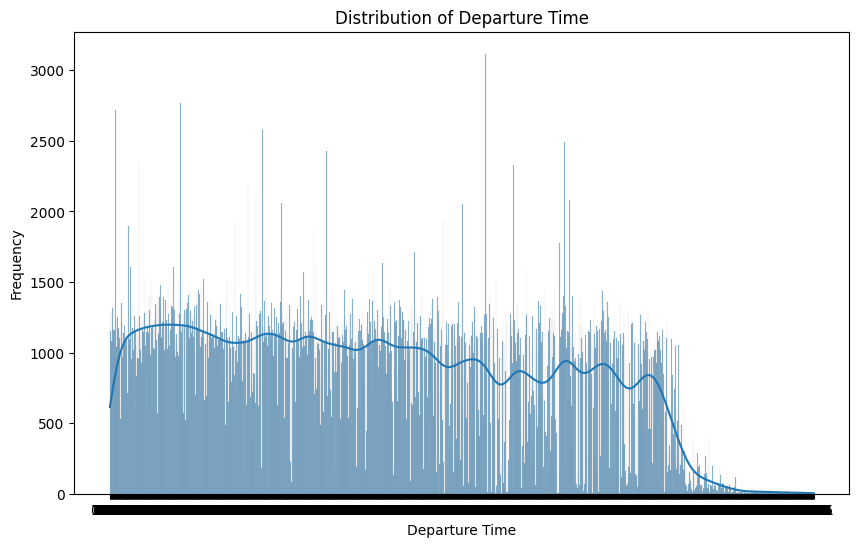

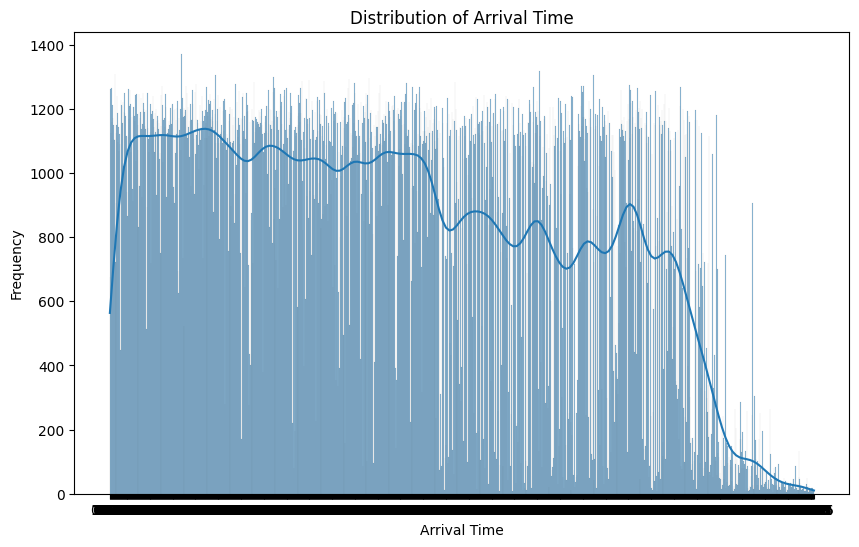

In [38]:
#distribution of dep_time anf arr_time using hist plot

merge_dfs = merge_dfs.reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.histplot(merge_dfs['DEP_TIME'], bins=20, kde=True)
plt.title('Distribution of Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(merge_dfs['ARR_TIME'], bins=20, kde=True)
plt.title('Distribution of Arrival Time')
plt.xlabel('Arrival Time')
plt.ylabel('Frequency')
plt.show()

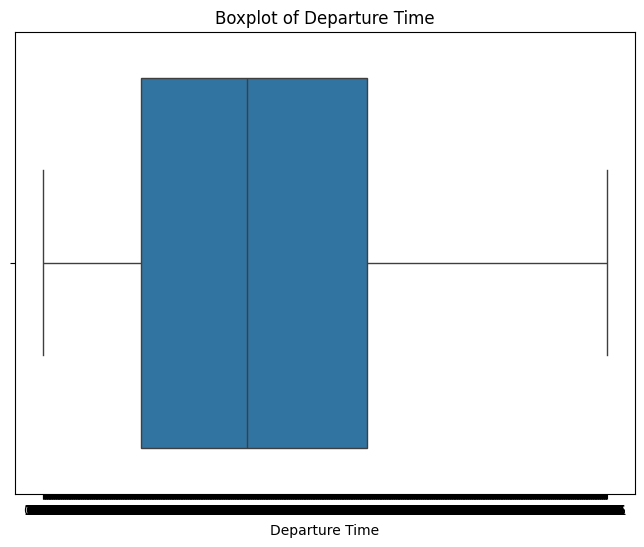

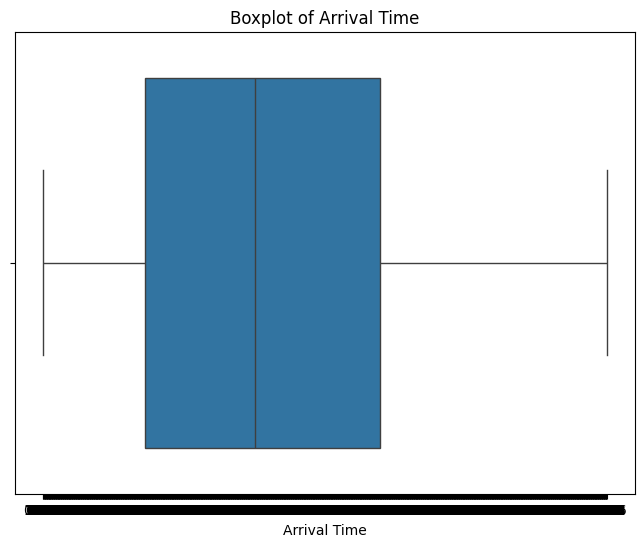

In [39]:
#checking for outliers using boxplot for dept_time and arr_time

merge_dfs = merge_dfs.reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.boxplot(x=merge_dfs['DEP_TIME'])
plt.title('Boxplot of Departure Time')
plt.xlabel('Departure Time')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=merge_dfs['ARR_TIME'])
plt.title('Boxplot of Arrival Time')
plt.xlabel('Arrival Time')
plt.show()

In [40]:
#as dep_time amd arr_time are categorical feature we can use mode imputatiobn for handling missing values

merge_dfs['DEP_TIME'].fillna(merge_dfs['DEP_TIME'].mode()[0], inplace=True)
merge_dfs['ARR_TIME'].fillna(merge_dfs['ARR_TIME'].mode()[0], inplace=True)

<ipython-input-40-64445444c438>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_dfs['DEP_TIME'].fillna(merge_dfs['DEP_TIME'].mode()[0], inplace=True)
<ipython-input-40-64445444c438>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [41]:
#handling missing values for TAIL_NUM

merge_dfs['TAIL_NUM'].fillna(merge_dfs['TAIL_NUM'].mode()[0], inplace=True)

<ipython-input-41-f3f8bbcdecb7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_dfs['TAIL_NUM'].fillna(merge_dfs['TAIL_NUM'].mode()[0], inplace=True)


In [42]:
merge_dfs.isnull().sum()

,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
OP_CARRIER_AIRLINE_ID,0
OP_CARRIER,0
TAIL_NUM,0
OP_CARRIER_FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN_AIRPORT_SEQ_ID,0
ORIGIN,0
DEST_AIRPORT_ID,0


In [43]:
merge_dfs['ARR_DEL15'].unique()



array([0, 1])

In [44]:
# Check for class imbalance in the target variable ('Arrival Delay Indicator')
class_counts = merge_dfs['ARR_DEL15'].value_counts()
print(class_counts)

# Calculate the percentage of each class
class_percentages = class_counts / len(merge_dfs) * 100
print(class_percentages)

ARR_DEL15
0    1003824
1     187507
Name: count, dtype: int64
ARR_DEL15
0    84.260713
1    15.739287
Name: count, dtype: float64


##INFERENCE

The plot shows the class distribution of the 'ARR_DEL15' feature, which indicates arrival delay of 15 minutes or more.  The distribution is highly imbalanced.  The majority of flights are not delayed (ARR_DEL15 = 0), while a significantly smaller number of flights experience delays (ARR_DEL15 = 1).  This imbalance needs to be addressed during model training to prevent the model from being biased towards the majority class and performing poorly on the minority class (delayed flights).  Techniques like oversampling the minority class, undersampling the majority class, using cost-sensitive learning, or adjusting class weights during model training should be considered.

In [45]:
merge_dfs.shape

(1191331, 21)

Text(0, 0.5, 'Frequency')

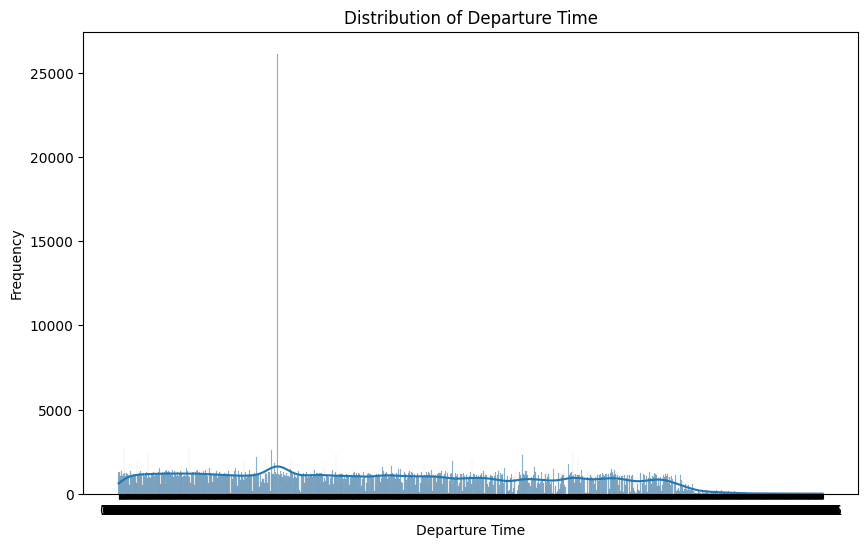

In [46]:
#Visual distribution of DEP_TIME

plt.figure(figsize=(10, 6))
sns.histplot(merge_dfs['DEP_TIME'], bins=20, kde=True)
plt.title('Distribution of Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Frequency')

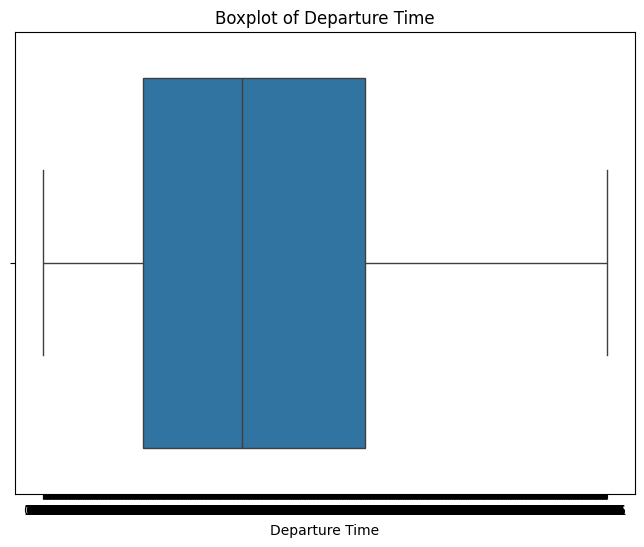

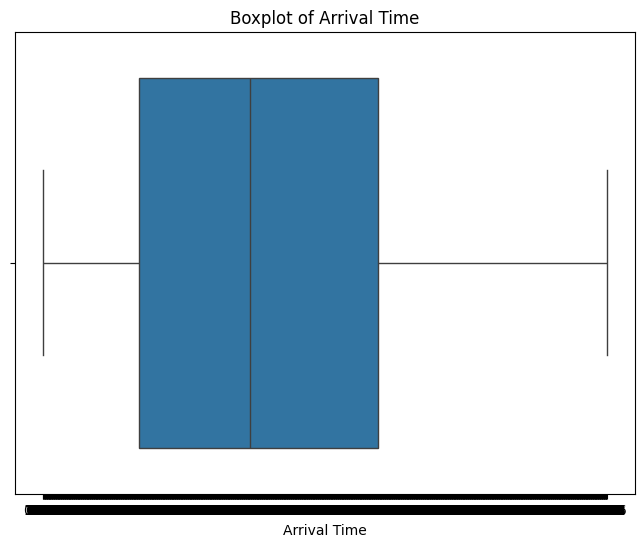

In [47]:
#box plot for dep time and arr time

plt.figure(figsize=(8, 6))
sns.boxplot(x=merge_dfs['DEP_TIME'])
plt.title('Boxplot of Departure Time')
plt.xlabel('Departure Time')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=merge_dfs['ARR_TIME'])
plt.title('Boxplot of Arrival Time')
plt.xlabel('Arrival Time')
plt.show()

Text(0, 0.5, 'Frequency')

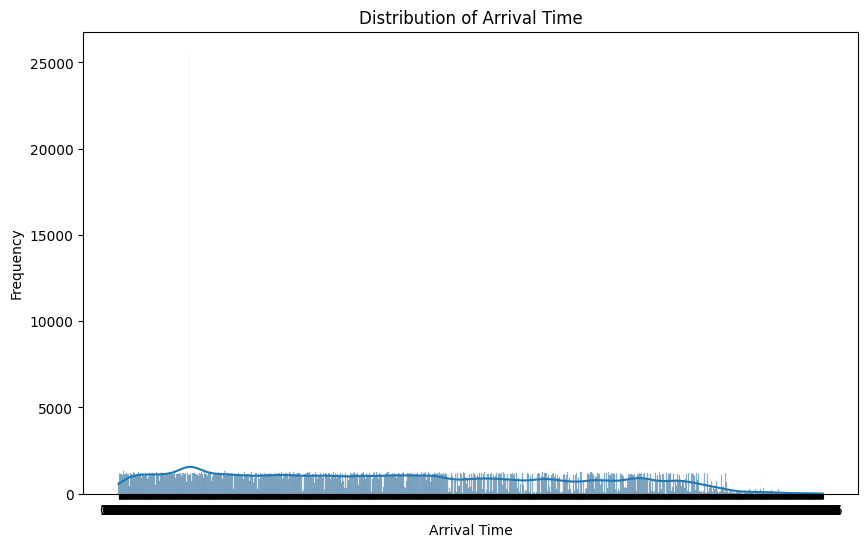

In [48]:
#vizualizing distribution of ARR_TIME

plt.figure(figsize=(10, 6))
sns.histplot(merge_dfs['ARR_TIME'], bins=20, kde=True)
plt.title('Distribution of Arrival Time')
plt.xlabel('Arrival Time')
plt.ylabel('Frequency')



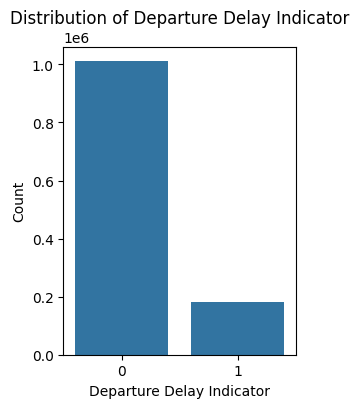

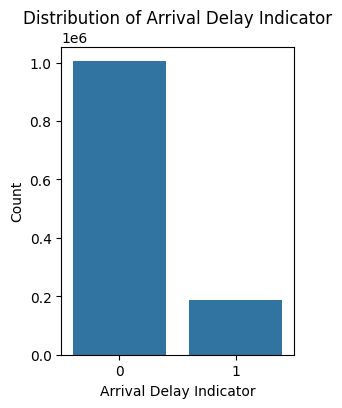

In [49]:
#vizualising distribution for DEP_DEL15 and ARR_DEL15

plt.figure(figsize=(3, 4))
sns.countplot(x='DEP_DEL15', data=merge_dfs)
plt.title('Distribution of Departure Delay Indicator')
plt.xlabel('Departure Delay Indicator')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(3, 4))
sns.countplot(x='ARR_DEL15', data=merge_dfs)
plt.title('Distribution of Arrival Delay Indicator')
plt.xlabel('Arrival Delay Indicator')
plt.ylabel('Count')
plt.show()

In [50]:
#using  SMOTE for ARR_DEL15 as it is highly imbalanced dataset

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Features and target
X = merge_dfs.drop(columns=['ARR_DEL15'])
y = merge_dfs['ARR_DEL15']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Handle missing values in ARR_DEL15 and other features
X = merge_dfs.drop(columns=['ARR_DEL15']).select_dtypes(include=['number'])
y = merge_dfs['ARR_DEL15']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


Text(0, 0.5, 'Count')

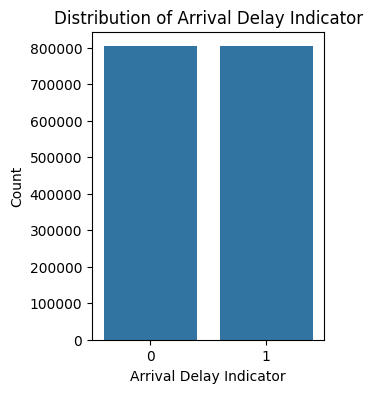

In [53]:
#checking distribution of arr_del15 using bar plot

plt.figure(figsize=(3, 4))
sns.countplot(x=y_train_resampled)
plt.title('Distribution of Arrival Delay Indicator')
plt.xlabel('Arrival Delay Indicator')
plt.ylabel('Count')

In [54]:
import pandas as pd

# Check the distribution of the target after SMOTE
print(pd.Series(y_train_resampled).value_counts())


ARR_DEL15
0    803127
1    803127
Name: count, dtype: int64


In [55]:
#converting cancelled feature into int
merge_dfs['CANCELLED'] = merge_dfs['CANCELLED'].astype(int)
merge_dfs['CANCELLED'].unique()

array([0, 1])

In [56]:
#onvering Diverted feature into int
merge_dfs['DIVERTED'] = merge_dfs['DIVERTED'].astype(int)
merge_dfs['DIVERTED'].unique()




array([0, 1])

In [57]:
#converting distance feature into int

merge_dfs['DISTANCE']=merge_dfs['DISTANCE'].astype(int)
merge_dfs['DISTANCE'].unique()


array([ 300,  596,  229, ...,  186, 2557, 2559])

In [58]:
merge_dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191331 entries, 0 to 1191330
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   DAY_OF_MONTH           1191331 non-null  int64 
 1   DAY_OF_WEEK            1191331 non-null  int64 
 2   OP_CARRIER_AIRLINE_ID  1191331 non-null  int64 
 3   OP_CARRIER             1191331 non-null  object
 4   TAIL_NUM               1191331 non-null  object
 5   OP_CARRIER_FL_NUM      1191331 non-null  int64 
 6   ORIGIN_AIRPORT_ID      1191331 non-null  int64 
 7   ORIGIN_AIRPORT_SEQ_ID  1191331 non-null  int64 
 8   ORIGIN                 1191331 non-null  object
 9   DEST_AIRPORT_ID        1191331 non-null  int64 
 10  DEST_AIRPORT_SEQ_ID    1191331 non-null  int64 
 11  DEST                   1191331 non-null  object
 12  DEP_TIME               1191331 non-null  object
 13  DEP_DEL15              1191331 non-null  int64 
 14  ARR_TIME               1191331 non

In [59]:
#performing label encoding on categorical features

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = merge_dfs.select_dtypes(include=['object']).columns

for column in categorical_columns:
    merge_dfs[column] = label_encoder.fit_transform(merge_dfs[column])

    print(f"Column '{column}' has been label encoded.")
    print(f"Unique values in '{column}': {label_encoder.classes_}")

    print("\n")

Column 'OP_CARRIER' has been label encoded.
Unique values in 'OP_CARRIER': ['9E' 'AA' 'AS' 'B6' 'DL' 'EV' 'F9' 'G4' 'HA' 'MQ' 'NK' 'OH' 'OO' 'UA'
 'WN' 'YV' 'YX']


Column 'TAIL_NUM' has been label encoded.
Unique values in 'TAIL_NUM': ['215NV' '216NV' '217NV' ... 'N999DN' 'N999JB' 'N999JQ']


Column 'ORIGIN' has been label encoded.
Unique values in 'ORIGIN': ['ABE' 'ABI' 'ABQ' 'ABR' 'ABY' 'ACT' 'ACV' 'ACY' 'ADK' 'ADQ' 'AEX' 'AGS'
 'ALB' 'ALO' 'AMA' 'ANC' 'APN' 'ART' 'ASE' 'ATL' 'ATW' 'ATY' 'AUS' 'AVL'
 'AVP' 'AZA' 'AZO' 'BDL' 'BET' 'BFF' 'BFL' 'BFM' 'BGM' 'BGR' 'BHM' 'BIL'
 'BIS' 'BJI' 'BLI' 'BLV' 'BMI' 'BNA' 'BOI' 'BOS' 'BPT' 'BQK' 'BQN' 'BRD'
 'BRO' 'BRW' 'BTM' 'BTR' 'BTV' 'BUF' 'BUR' 'BWI' 'BZN' 'CAE' 'CAK' 'CDC'
 'CDV' 'CGI' 'CHA' 'CHO' 'CHS' 'CID' 'CIU' 'CKB' 'CLE' 'CLL' 'CLT' 'CMH'
 'CMI' 'CMX' 'CNY' 'COD' 'COS' 'COU' 'CPR' 'CRP' 'CRW' 'CSG' 'CVG' 'CWA'
 'CYS' 'DAB' 'DAL' 'DAY' 'DBQ' 'DCA' 'DEN' 'DFW' 'DHN' 'DLH' 'DRO' 'DRT'
 'DSM' 'DTW' 'DVL' 'EAR' 'EAU' 'ECP' 'EGE' 'EKO' 'ELM'

In [60]:
# Calculate correlation only on numeric columns
numeric_columns = merge_dfs[numerical_features]
correlation_matrix = merge_dfs[numerical_features].corr()

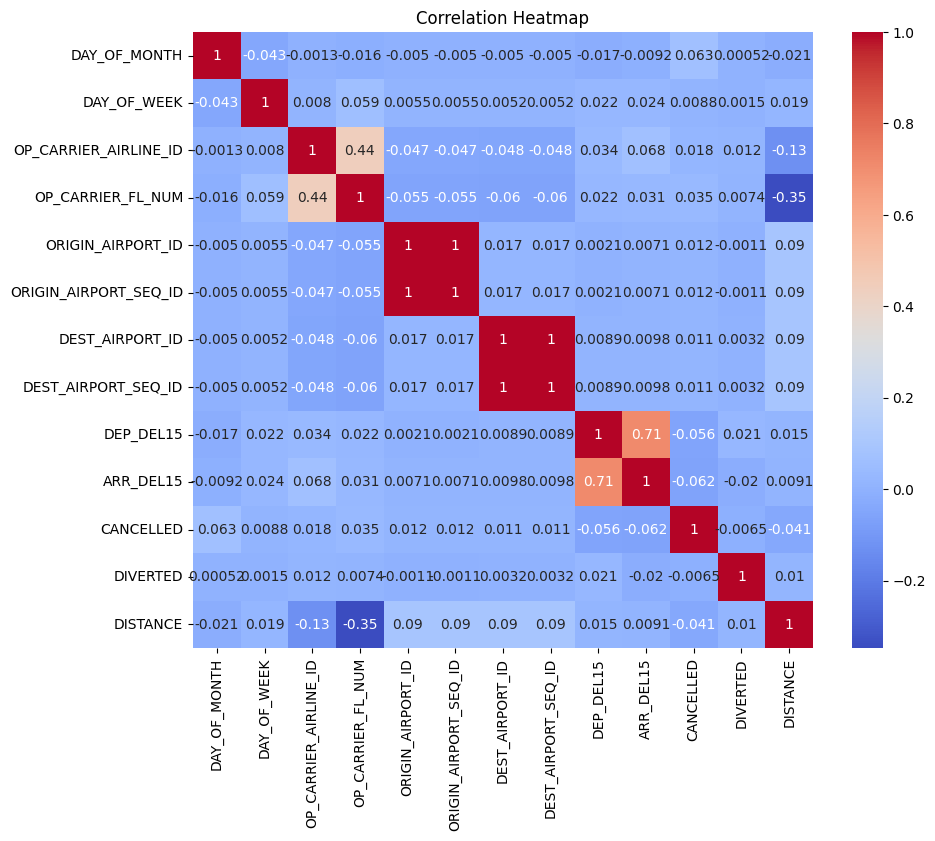

In [61]:
#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Text(0, 0.5, 'Arrival Time')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


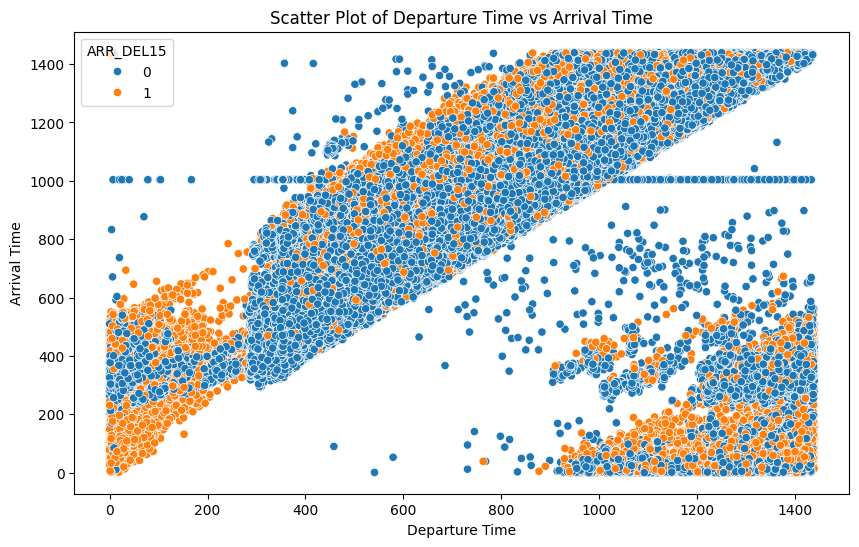

In [62]:
#bivariate analysis
#Numerical vs Numerical use different color for both

plt.figure(figsize=(10, 6))
sns.scatterplot(x='DEP_TIME', y='ARR_TIME', data=merge_dfs, hue='ARR_DEL15')
plt.title('Scatter Plot of Departure Time vs Arrival Time')
plt.xlabel('Departure Time')
plt.ylabel('Arrival Time')


# INFERENCE

The scatter plot of Departure Time vs. Arrival Time, colored by the 'ARR_DEL15' (Arrival Delay Indicator), shows the relationship between these three variables.  Here's how to interpret it:

* **Overall Distribution:** The plot reveals the general pattern of departure and arrival times.  A diagonal trend suggests that flights departing earlier generally arrive earlier and vice versa. Deviations from the diagonal line might indicate delays or other factors affecting flight times.

* **ARR_DEL15 Impact:** The color coding by 'ARR_DEL15' highlights the influence of arrival delays on the relationship between departure and arrival times.

    * **Delayed Flights (ARR_DEL15 = 1, likely colored differently):** Points representing delayed flights are scattered across the plot, potentially deviating further from the diagonal. This suggests that arrival delays can occur at various departure times.  Some clusters of these points might indicate specific times when delays are more common.
    * **On-Time Flights (ARR_DEL15 = 0):**  These points cluster more around the diagonal, suggesting a more direct relationship between departure and arrival times.


**In summary:** The scatter plot helps to visually explore how arrival delays correlate with both departure time and arrival time. By examining the distribution of points, especially those colored for arrival delays, you can identify potential patterns and relationships that could be further explored in a predictive model.  It's important to look for clusters of delayed flights, potential outliers, and any trends or patterns that might emerge.  It doesn't directly answer *why* delays occur, but it provides visual clues about *when* they are more likely.


Text(0, 0.5, 'Departure Time')

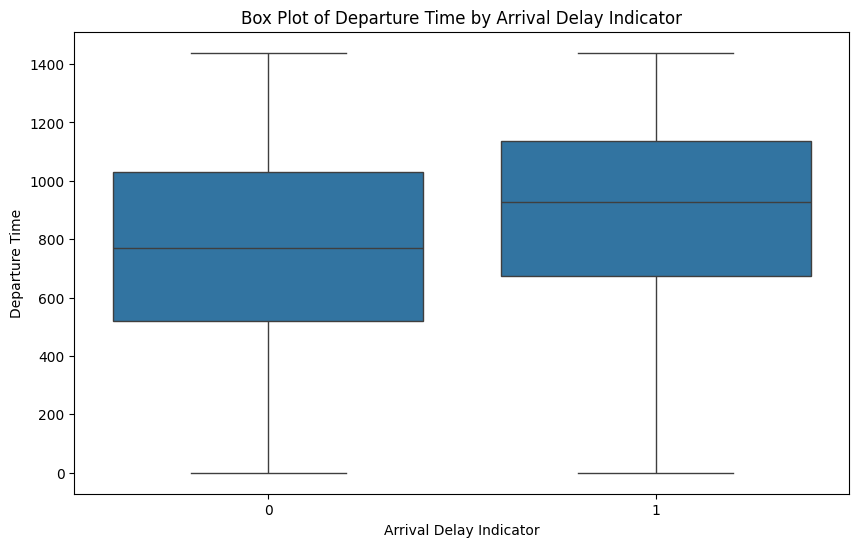

In [63]:
#bivariate analysis
#Numerical vs Categorical

plt.figure(figsize=(10, 6))
sns.boxplot(x='ARR_DEL15', y='DEP_TIME', data=merge_dfs)
plt.title('Box Plot of Departure Time by Arrival Delay Indicator')
plt.xlabel('Arrival Delay Indicator')
plt.ylabel('Departure Time')



Text(0, 0.5, 'Departure Time')

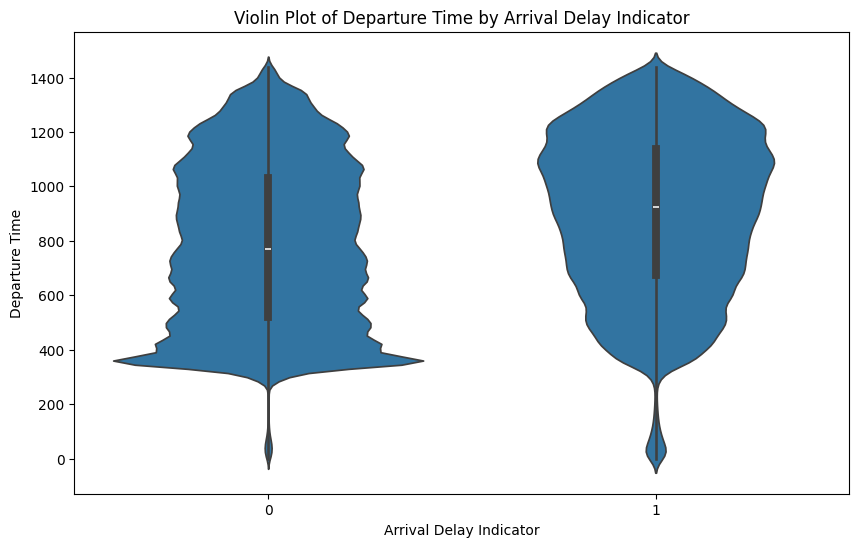

In [64]:
##Numerical vs Categorical  violin plot

plt.figure(figsize=(10, 6))
sns.violinplot(x='ARR_DEL15', y='DEP_TIME', data=merge_dfs)
plt.title('Violin Plot of Departure Time by Arrival Delay Indicator')
plt.xlabel('Arrival Delay Indicator')
plt.ylabel('Departure Time')



In [65]:
#hypothesis testing
import scipy.stats as stats

group1 = merge_dfs[merge_dfs['ARR_DEL15'] == 0]['DISTANCE'] # Non-delayed flights
group2 = merge_dfs[merge_dfs['ARR_DEL15'] == 1]['DISTANCE'] # Delayed flights

#  t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)


print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in feature distances between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in feature distances between the two groups.")

T-statistic: -9.97561795219019
P-value: 1.9529801533836304e-23
Reject the null hypothesis: There is a statistically significant difference in feature distances between the two groups.


In [66]:
 #Effect of Cancellations (CANCELLED) on Delays (hypothesis testing)

group1 = merge_dfs[merge_dfs['CANCELLED'] == 0]['ARR_DEL15'] # Non-cancelled flights
group2 = merge_dfs[merge_dfs['CANCELLED'] == 1]['ARR_DEL15'] # Cancelled flights

#  t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)


print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in arrival delays between the two groups.")
    print("Cancellations have a statistically significant impact on arrival delays.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in arrival delays between the two groups.")
    print("Cancellations do not have a statistically significant impact on arrival delays.")




T-statistic: 67.2682255073582
P-value: 0.0
Reject the null hypothesis: There is a statistically significant difference in arrival delays between the two groups.
Cancellations have a statistically significant impact on arrival delays.


In [67]:
#train test split

from sklearn.model_selection import train_test_split
# Features and target
X = merge_dfs.drop(columns=['ARR_DEL15'])
y = merge_dfs['ARR_DEL15']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:

X = merge_dfs.drop(columns=['ARR_DEL15'])  # Drop target variable
y = merge_dfs['ARR_DEL15']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [69]:

#model training and evaluation
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Model Training and Evaluation
models = {

    "Random Forest": RandomForestClassifier()
}

results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    results[model_name] = accuracy
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 30)

best_model_name = max(results, key=results.get)
print(f"The best performing model is: {best_model_name} with accuracy: {results[best_model_name]}")

Training Random Forest...
Random Forest Accuracy: 0.9326973521301732
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    200697
           1       0.78      0.80      0.79     37570

    accuracy                           0.93    238267
   macro avg       0.87      0.88      0.87    238267
weighted avg       0.93      0.93      0.93    238267

[[192259   8438]
 [  7598  29972]]
------------------------------
The best performing model is: Random Forest with accuracy: 0.9326973521301732


In [70]:
 # Model Training and Evaluation

 Models = {
     "Gradient Boosting": GradientBoostingClassifier()

 }

results = {}
for model_name, model in Models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")

    results[model_name] = accuracy
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 30)

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9185367675758708
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    200697
           1       0.74      0.76      0.75     37570

    accuracy                           0.92    238267
   macro avg       0.84      0.85      0.85    238267
weighted avg       0.92      0.92      0.92    238267

[[190490  10207]
 [  9203  28367]]
------------------------------


In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt'],
    'bootstrap': [True]
}


rf = RandomForestClassifier(random_state=42, warm_start=True)


random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=50, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Use a smaller subset of the data (20%)
X_train_resampled_subset = X_train_resampled.sample(frac=0.2, random_state=42)
y_train_resampled_subset = y_train_resampled.sample(frac=0.2, random_state=42)

# Fit RandomizedSearchCV to the subset of the data
random_search.fit(X_train_resampled_subset, y_train_resampled_subset)






Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(random_state=42,
                                                    warm_start=True),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None, 10],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7df95dc584c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7df966b5bca0>,
                                        'n_estimators': [50, 100]},
                   random_state=42, scoring='accuracy', verbose=2)

In [73]:
# best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf = random_search.best_estimator_

# Evaluate the best model on test data
y_pred = best_rf.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
Accuracy: 0.919661556153391
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95    200697
           1       0.72      0.80      0.76     37570

    accuracy                           0.92    238267
   macro avg       0.84      0.87      0.86    238267
weighted avg       0.92      0.92      0.92    238267



# Conclusion

# This code performs an analysis of flight data to predict arrival delays.
# It begins by loading and preprocessing the data, handling missing values,
# and correcting data formats.  Exploratory Data Analysis (EDA) is then
# conducted to visualize the data's distribution and identify potential
# relationships between variables, including hypothesis testing.

# Feature engineering and encoding prepare the data for machine learning.
# The code addresses class imbalance using SMOTE and then trains and
# evaluates multiple classification models, including Random Forest and
# Gradient Boosting.  Hyperparameter tuning is performed on Random Forest
# to optimize performance.

# The final output provides the accuracy and classification reports for each
# model, enabling comparison and selection of the best-performing model for
# predicting arrival delays.